**2.IMAGE AUGMENTATION**

In [3]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

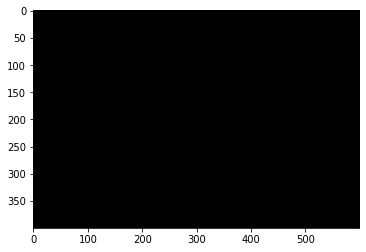

In [2]:
img=np.zeros((400,600,3),np.uint8)
plt.imshow(img)

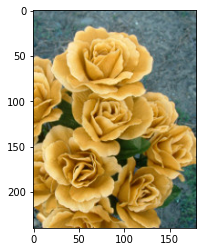

In [4]:
img=cv2.imread('/content/3550491463_3eb092054c_m.jpg')
plt.imshow(img)

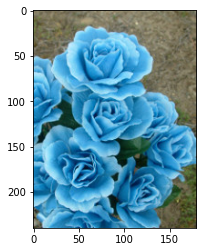

In [5]:
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

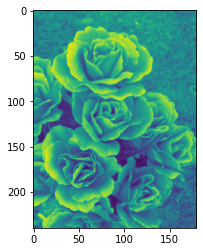

In [6]:
 img_gry=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gry)

In [7]:
img_rgb.shape

(240, 180, 3)

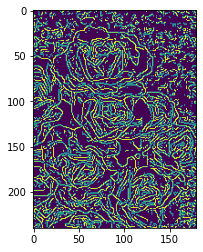

In [8]:
# Edge Detection
edge=cv2.Canny(img_rgb,100,100)
plt.imshow(edge)

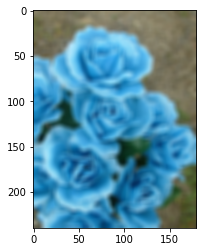

In [9]:
blur=cv2.GaussianBlur(img_rgb,(7,7),cv2.BORDER_DEFAULT)
plt.imshow(blur)

In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

In [13]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

img = load_img('/content/3550491463_3eb092054c_m.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/SURYA', save_prefix='rose', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

**3.CREATE MODEL**

In [14]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [32]:
classifier=Sequential()

**4.ADD LAYERS**

In [16]:
classifier.add(Conv2D(32,(3,3),input_shape=(64,64,3),activation='relu'))

In [17]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

In [18]:
classifier.add(Flatten())

**DENSE**

In [19]:
classifier.add(Dense(units=1,activation='sigmoid'))

In [21]:
classifier.add(Dense(units=128,activation='relu'))

**5.COMPILE THE MODEL**

In [22]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

**6.FIT THE MODEL**

In [33]:
train_datagen=ImageDataGenerator(rescale=1./255,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1./255)


In [25]:
training_set=train_datagen.flow_from_directory('/SURYA', 
target_size=(64,64),
batch_size=32,
class_mode='binary')

Found 0 images belonging to 0 classes.


In [26]:
test_set=test_datagen.flow_from_directory('/SURYA',
target_size=(64,64),
batch_size=32,
class_mode='binary')

Found 0 images belonging to 0 classes.


**7.TEST THE MODEL**

In [30]:
test_image=image.load_img('/content/3550491463_3eb092054c_m.jpg', target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
training_set.class_indices

if result[0][0]==1:
  prediction='sunflower'
else:
  prediction='rose'
print(prediction)

rose


In [ ]:
test_image=image.load_img('/content/3550491463_3eb092054c_m.jpg', target_size=(64,64))
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)
result=classifier.predict(test_image)
training_set.class_indices

if result[0][0]==1:
  prediction='sunflower'
else:
  prediction='rose'
print(prediction)

**8.SAVE THE MODEL**

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow.keras.models import load_model

 model.save('/content/drive/MyDrive/maaran.hdf5')